In [1]:
import numpy as np
import os
import segyio
import glob

from pyfrac.visualisation.plotting_support import explode_volume

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def read_seis(seisfile, nr):
    # s_wave_file = os.path.join(data_path,'test.bin.curl')
    seis_flat = np.loadtxt(seisfile)

    # determine number of timesamples and ensure it saved fully
    nt = int(seis_flat.shape[0] / nr)
    try:
        seis_flat.reshape((nr, nt))
    except:
        print('Not good dims \n nt:%i nr:%i \n vz flat:%i' % (nt, nr, seis_flat.shape[0]))

    # Resample to 2D
    seis = seis_flat[:nt * nr].reshape((nr, nt))
    return seis

In [3]:
expname = 'homo_exp'
# expname = 'homo_MT_0_45_90'

vz = read_seis('/home/birniece/Documents/Projects/MicroseismicModelling/SOFI-modelling/pyfrac_SOFIModelling/outputs/su/%s_vy.txt'%expname, 
               nr=143)

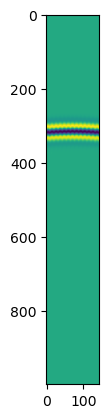

In [4]:
plt.imshow(vz.T)

In [5]:
def read_snap(snap_file, modshape, snap_sbsmp=1, nbounds=0., freesurface=False):
    '''modshape = [nx,ny,nz]
    '''
    # Read in snaps file
    snaps_1d = np.fromfile(snap_file, dtype='<f')

    # Get snap dimensions
    snap_nx = int(modshape[0] / snap_sbsmp)
    snap_ny = int(modshape[1] / snap_sbsmp)
    snap_nz = int(modshape[2] / snap_sbsmp)
    nsnaps = int(snaps_1d.shape[0] / (snap_nx * snap_ny * snap_nz))

    snaps_4d = snaps_1d.reshape([nsnaps, snap_ny, snap_nx, snap_nz,])
    snaps_4d = np.transpose(snaps_4d, [0, 3, 2, 1])
    # snaps_4d = np.transpose(snaps_4d, [0, 2, 1, 3])

    if np.float64(nbounds) == 0.:
        return snaps_4d
    else:
        bounds_shift = int(nbounds / snap_sbsmp)
        if not freesurface:
            snaps_4d_excbounds = snaps_4d[:,
                                 bounds_shift:-bounds_shift,
                                 bounds_shift:-bounds_shift,
                                 bounds_shift:-bounds_shift]
        else:
            snaps_4d_excbounds = snaps_4d[:,
                                 :-bounds_shift,
                                 bounds_shift:-bounds_shift,
                                 bounds_shift:-bounds_shift]
        return snaps_4d, snaps_4d_excbounds
    

In [6]:
snaps, _ = read_snap('/home/birniece/Documents/Projects/MicroseismicModelling/SOFI-modelling/pyfrac_SOFIModelling/outputs/snap/%s.bin.vy'%expname,
                  [112, 128, 224], 
                  snap_sbsmp=2, 
                     nbounds=30, 
                     freesurface=True
                    )

In [7]:
snaps.shape

(12, 112, 56, 64)

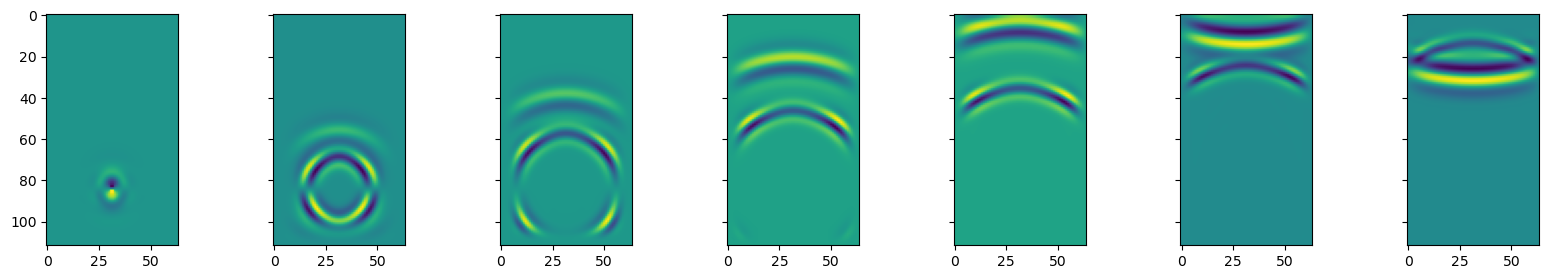

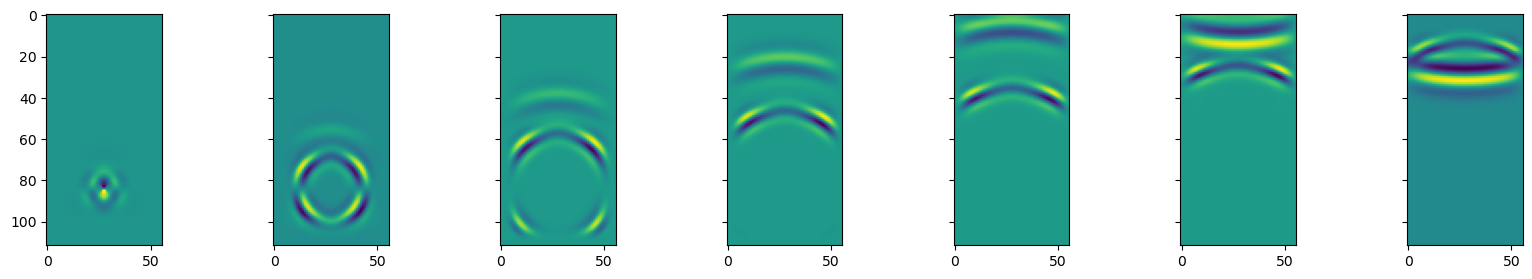

In [8]:
fig,axs = plt.subplots(1,7,figsize=[20,3], sharex=True, sharey=True)
for i,ax in enumerate(axs):
    ax.imshow(snaps[i+2][:,28])

fig,axs = plt.subplots(1,7,figsize=[20,3], sharex=True, sharey=True)
for i,ax in enumerate(axs):
    ax.imshow(snaps[i+2][:,:,32])